<a href="https://colab.research.google.com/github/HimanshuSahoo/DATA-SCIENCE/blob/main/Excelr_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv("C:/Users/mruge/Downloads/emails1")
data

,Unnamed: 0,filename,Message-ID,content,Class
0,0,arnold-j/_sent_mail/34.,<15267340.1075857594923.JavaMail.evans@thyme>,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive
1,1,arnold-j/_sent_mail/517.,<15539583.1075857652152.JavaMail.evans@thyme>,fuck you,Abusive
2,2,arnold-j/_sent_mail/743.,<4339799.1075857657711.JavaMail.evans@thyme>,Gentlemen:\nThe following champagne is availab...,Abusive
3,3,arnold-j/_sent_mail/766.,<25574783.1075857658215.JavaMail.evans@thyme>,sorry i've taken so long...just been trying to...,Abusive
4,4,arnold-j/_sent_mail/797.,<19506151.1075857658895.JavaMail.evans@thyme>,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive
...,...,...,...,...,...
48071,48071,campbell-l/notes_inbox/133.,<6503484.1075857876489.JavaMail.evans@thyme>,"Dear Market Participants,\n\nPlease note the c...",Non Abusive
48072,48072,campbell-l/notes_inbox/134.,<17277180.1075857876513.JavaMail.evans@thyme>,"According to my fancy ciphering we made $310,0...",Non Abusive
48073,48073,campbell-l/notes_inbox/135.,<31066400.1075857876537.JavaMail.evans@thyme>,BUSINESS HIGHLIGHTS\n\nWeather Group\n\nLet=01...,Non Abusive
48074,48074,campbell-l/notes_inbox/136.,<26024436.1075857876659.JavaMail.evans@thyme>,Welcome to: DIAMONDS NEWSLETTER Issue:...,Non Abusive


In [ ]:
# Data structure
type(data)

pandas.core.frame.DataFrame

In [ ]:
data.shape

(48076, 5)

In [ ]:
data.dtypes

Unnamed: 0     int64
filename      object
Message-ID    object
content       object
Class         object
dtype: object

### EDA

In [ ]:
# Drop unnecessary columns
data.drop(columns=['Unnamed: 0','filename','Message-ID'], inplace=True)

In [ ]:
data.head()

,content,Class
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive
1,fuck you,Abusive
2,Gentlemen:\nThe following champagne is availab...,Abusive
3,sorry i've taken so long...just been trying to...,Abusive
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
data['Class'] = encoder.fit_transform(data['Class'])

In [ ]:
data.head()

,content,Class
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,0
1,fuck you,0
2,Gentlemen:\nThe following champagne is availab...,0
3,sorry i've taken so long...just been trying to...,0
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,0


In [ ]:
# Check for missing values
data.isnull().sum()

content    0
Class      0
dtype: int64

In [ ]:
# Check for duplicated values
data.duplicated().sum()

23420

In [ ]:
# Dropping the duplicates
data = data.drop_duplicates()

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.shape

(24656, 2)

In [ ]:
data['Class'].value_counts()

1    23014
0     1642
Name: Class, dtype: int64

<AxesSubplot:>

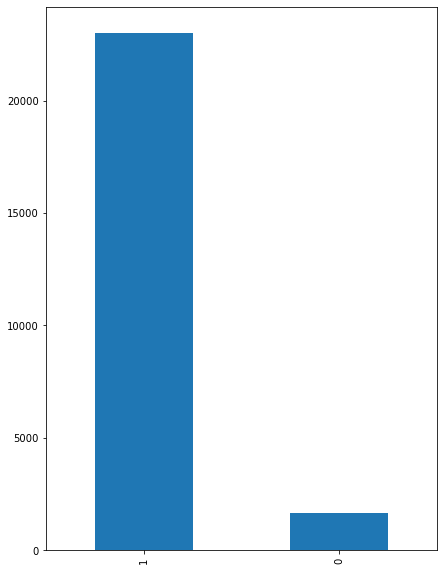

In [ ]:
import matplotlib.pyplot as pd
%matplotlib inline
data['Class'].value_counts().plot(kind='bar',figsize=(7,10))

The data is imbalanced

In [ ]:
# Remove stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mruge\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mruge\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# No of characters
data['num_char'] = data['content'].apply(len)

<ipython-input-19-41969d0db57e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num_char'] = data['content'].apply(len)


In [ ]:
data

,content,Class,num_char
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,0,220
1,fuck you,0,8
2,Gentlemen:\nThe following champagne is availab...,0,612
3,sorry i've taken so long...just been trying to...,0,505
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,0,203
...,...,...,...
47974,Do you need new leads for your business ?\n D...,1,1523
47975,"[IMAGE]\n [IMAGE] [IMAGE] GARTH BROOKS ""...",1,1126
47977,\n[IMAGE][IMAGE][IMAGE] \nDear SmartReminders ...,1,892
47980,\n[IMAGE]\n [IMAGE] [IMAGE] [IMAGE] KID ...,1,932


In [ ]:
# No of words
data['num_words'] = data['content'].apply(lambda x : len(nltk.word_tokenize(x)))

<ipython-input-21-0923ab015ac5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num_words'] = data['content'].apply(lambda x : len(nltk.word_tokenize(x)))


In [ ]:
data.head()

,content,Class,num_char,num_words
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,0,220,44
1,fuck you,0,8,2
2,Gentlemen:\nThe following champagne is availab...,0,612,99
3,sorry i've taken so long...just been trying to...,0,505,163
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,0,203,42


In [ ]:
# No of sentence
data['num_sent'] = data['content'].apply(lambda x : len(nltk.sent_tokenize(x)))

<ipython-input-23-ce808dd8d1f2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num_sent'] = data['content'].apply(lambda x : len(nltk.sent_tokenize(x)))


In [ ]:
data.head()

,content,Class,num_char,num_words,num_sent
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,0,220,44,1
1,fuck you,0,8,2,1
2,Gentlemen:\nThe following champagne is availab...,0,612,99,6
3,sorry i've taken so long...just been trying to...,0,505,163,8
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,0,203,42,2


In [ ]:
# for abussive
data[data['Class']==0][['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,1642.000000,1642.000000,1642.000000
mean,1690.338002,342.700365,16.955542
std,2834.633786,590.602208,32.171859
min,5.000000,1.000000,1.000000
25%,183.000000,40.250000,3.000000
50%,597.500000,123.000000,6.000000
75%,2121.000000,434.750000,19.000000
max,35528.000000,7112.000000,339.000000


In [ ]:
# for non-abussive
data[data['Class']==1][['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,23014.000000,23014.000000,23014.000000
mean,1806.440297,340.189580,12.257539
std,5532.160062,832.111557,26.480239
min,1.000000,1.000000,1.000000
25%,271.000000,51.000000,3.000000
50%,737.500000,143.000000,6.000000
75%,1728.000000,339.000000,13.000000
max,272036.000000,32296.000000,1088.000000


In [ ]:
# A list that contains a number of words in abussive mails and their count of occurrence in the data
data_abussive = data[data['Class'] == 0]
data_abussive_count = data_abussive['content'].str.split().str.len()
data_abussive_count.index = data_abussive_count.index.astype(str) + ' words:'
data_abussive_count.sort_index(inplace=True)

In [ ]:
# A list that contains a number of words in non_abussive mails and their count of occurrence in the data
data_non_abussive = data[data['Class'] == 1]
data_non_abussive_count = data_non_abussive['content'].str.split().str.len()
data_non_abussive_count.index = data_non_abussive_count.index.astype(str) + ' words:'
data_non_abussive_count.sort_index(inplace=True)

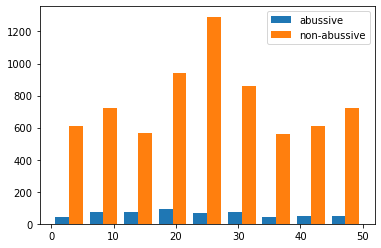

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
bins = np.linspace(0, 50, 10)

plt.hist([data_abussive_count, data_non_abussive_count], bins, label=['abussive', 'non-abussive'])
plt.legend(loc='upper right')
plt.show()

The plot shows that most of the abussive mails contains 0-50 words.

#### Data Preprocessing

In [ ]:
#Text Processing libraries
import nltk
nltk.download('stopwords')
nltk.download(['punkt', 'wordnet', 'averaged_perceptron_tagger'])
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mruge\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mruge\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mruge\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\mruge\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
def tokenize(content):

   #1. Normalize: Convert to lower case and remove punctuation
    content = re.sub(r"[^a-zA-Z0-9]", " ", content.lower().strip())
    
   #2. Tokenizing: split text into words
    tokens = word_tokenize(content)
    
   #3. Remove stop words: if a token is a stop word, then remove it
    words = [w for w in tokens if w not in stopwords.words("english")]
    
    #4. Lemmatize and Stemming
    lemmed_words = [WordNetLemmatizer().lemmatize(w) for w in words]
    
    clean_tokens = []
    
    for i in lemmed_words:
        clean_tokens.append(i)
        
        ## back to string from list
    content = " ".join(clean_tokens)
    return content
# return cleaned token

In [ ]:
data['Transformed_Text'] = data['content'].apply(lambda x: tokenize(x))
data.head()

<ipython-input-32-e73b4e98c628>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Transformed_Text'] = data['content'].apply(lambda x: tokenize(x))


,content,Class,num_char,num_words,num_sent,Transformed_Text
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,0,220,44,1,eat shit john j lavorato excelr 11 18 2000 01 ...
1,fuck you,0,8,2,1,fuck
2,Gentlemen:\nThe following champagne is availab...,0,612,99,6,gentleman following champagne available 70 app...
3,sorry i've taken so long...just been trying to...,0,505,163,8,sorry taken long trying fend chick life sooooo...
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,0,203,42,2,asshole john j lavorato excelr 12 23 2000 10 5...


#### Generate wordcloud

In [ ]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

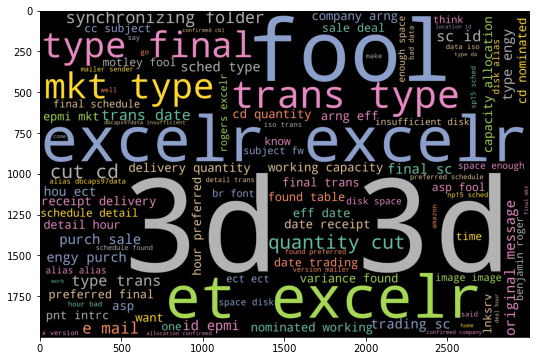

In [ ]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords)
# Plot
Abusive_wc = wordcloud.generate(data[data['Class'] == 0]['Transformed_Text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(Abusive_wc)

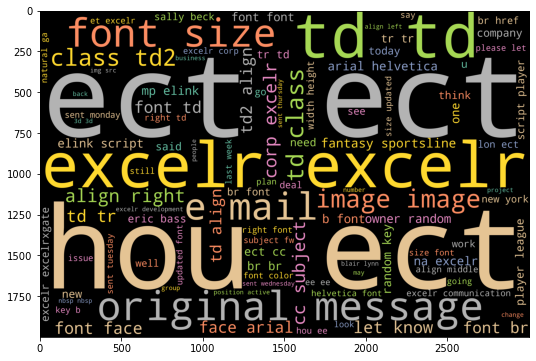

In [ ]:
Non_Abusive_wc = wordcloud.generate(data[data['Class'] == 1]['Transformed_Text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(Non_Abusive_wc)